<a href="https://colab.research.google.com/github/dodozaki/Machine-Learning/blob/main/Machine_learning_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import sklearn
from sklearn.linear_model import LogisticRegression
from statsmodels.tools import add_constant as add_constant
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

exploitation des données

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/heart1.csv'
data_heart=pd.read_csv(path)

In [4]:
data_heart.describe

<bound method NDFrame.describe of       male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4233     1   50        1.0  ...       66.0     86.0           1
4234     1   51        3.0  ...       65.0     68.0           0
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0

[4238 rows x 16 columns]>

In [6]:
data_heart.shape

(4238, 16)

In [7]:
data_heart.head

<bound method NDFrame.head of       male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4233     1   50        1.0  ...       66.0     86.0           1
4234     1   51        3.0  ...       65.0     68.0           0
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0

[4238 rows x 16 columns]>

valeur **manquante** 




In [8]:
data_heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
data_heart.dropna(axis=0,inplace=True)

**la relation entre les features**


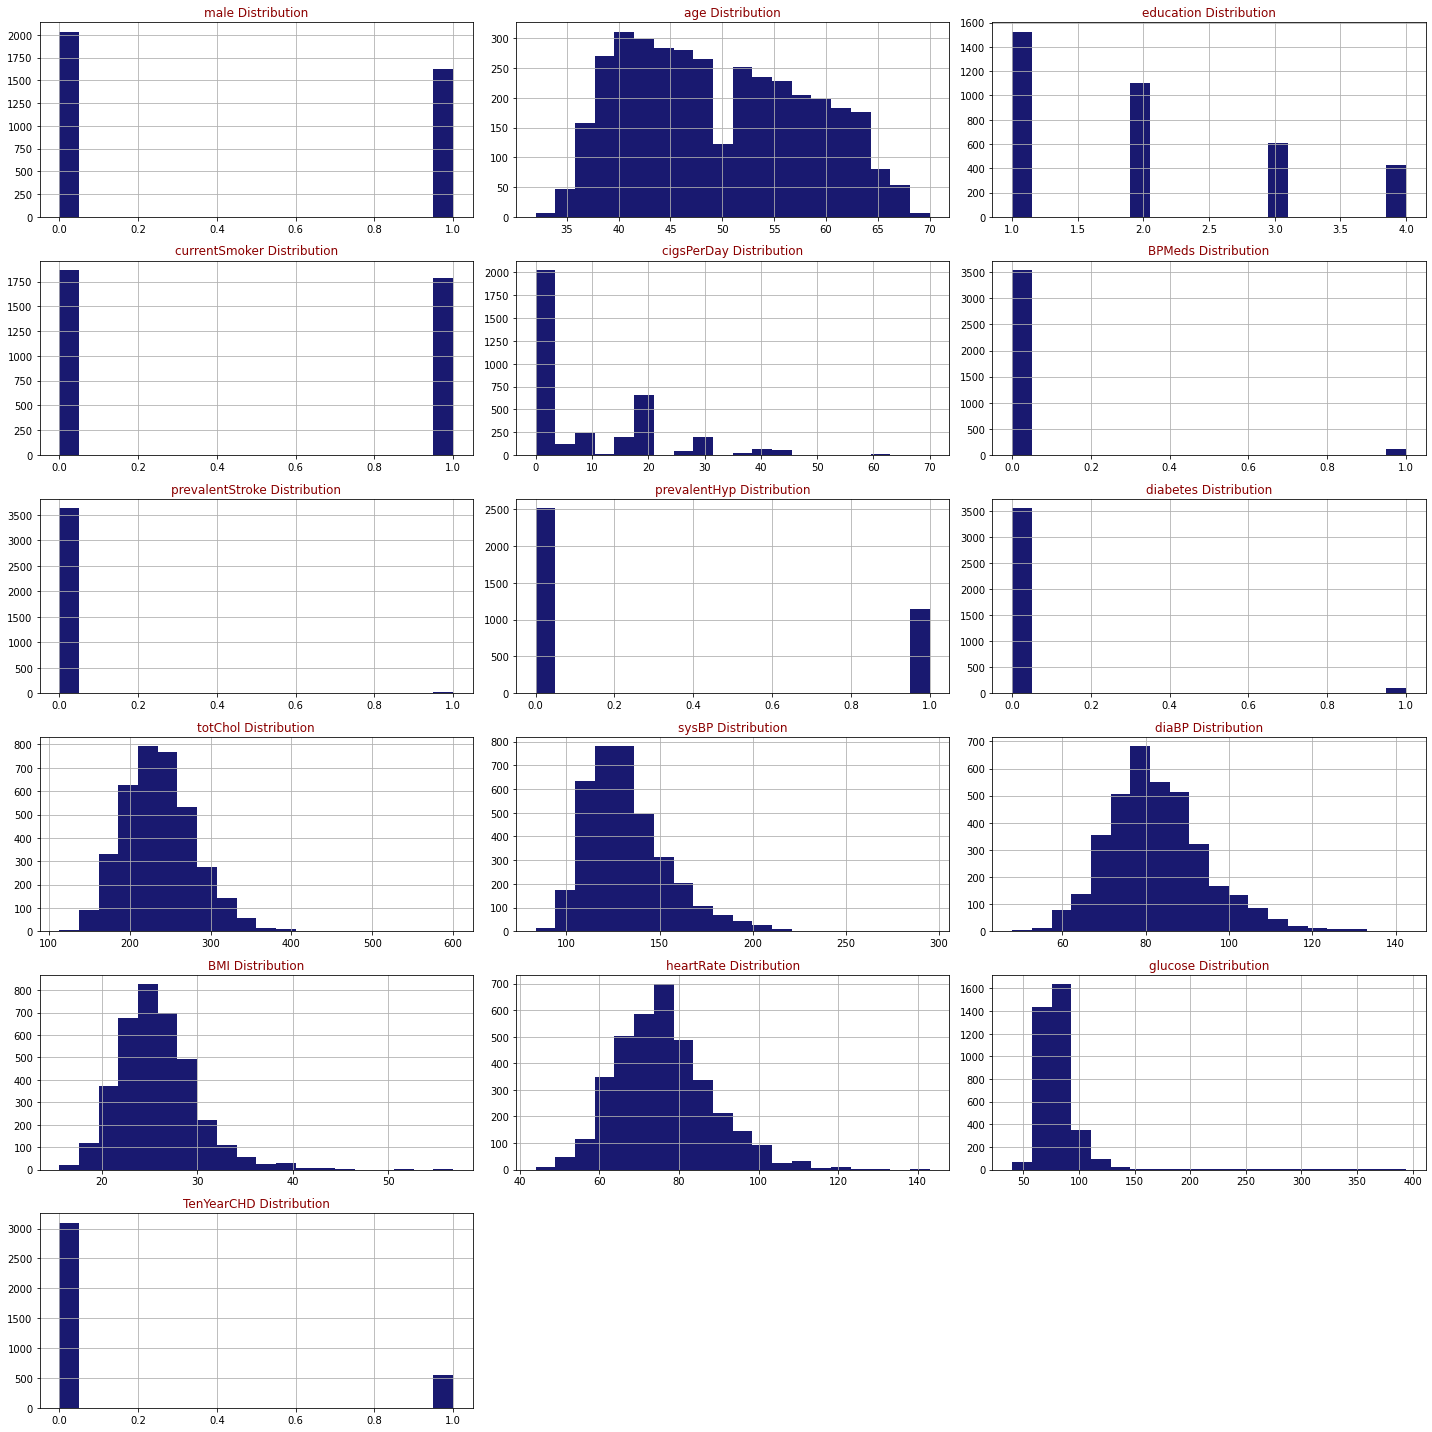

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data_heart,data_heart.columns,6,3)

0    3099
1     557
Name: TenYearCHD, dtype: int64

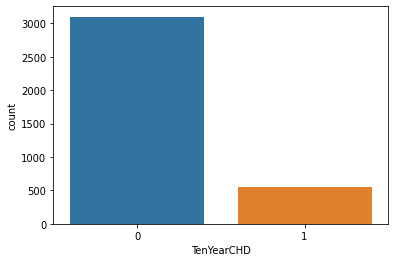

In [13]:
sn.countplot(x='TenYearCHD',data=data_heart)

data_heart.TenYearCHD.value_counts()

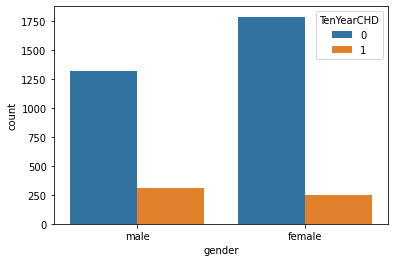

In [14]:
data = data_heart.copy()
data['male']  = data['male'].replace({0: 'female', 1:'male'})
data = data.rename(columns={'male':'gender'})
sns.countplot(data=data, x='gender', hue='TenYearCHD')

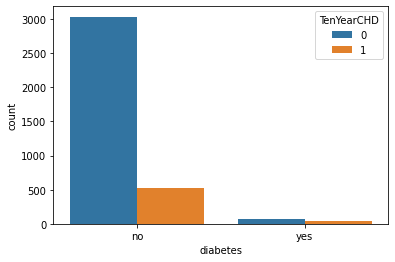

In [15]:
data['diabetes']  = data['diabetes'].replace({0: 'no', 1:'yes'})
sns.countplot(data=data, x='diabetes', hue='TenYearCHD')

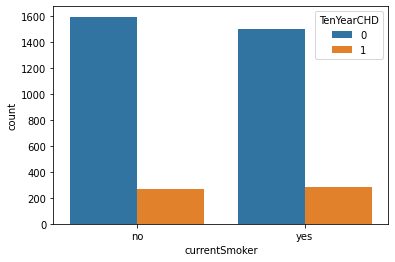

In [16]:
data['currentSmoker']  = data['currentSmoker'].replace({0: 'no', 1:'yes'})
sns.countplot(data=data, x='currentSmoker', hue='TenYearCHD')

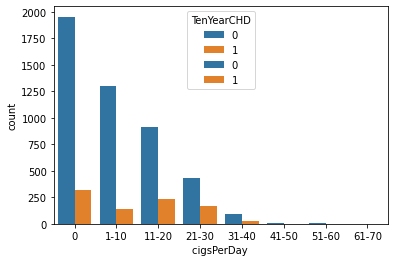

In [17]:
bins= [30,40,50,60,75]
labels = ['thirties','forties','fifties','sixties']

data['Age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

sns.countplot(data=data, x='Age_group', hue='TenYearCHD')

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

data['cigsPerDay '] = pd.cut(data['cigsPerDay'], bins=bins, labels=labels, right=False)

sns.countplot(data=data, x='cigsPerDay ', hue='TenYearCHD')

In [19]:
data_heart_constant = add_constant(data_heart)
data_heart_constant.head

<bound method NDFrame.head of       const  male  age  education  ...    BMI  heartRate  glucose  TenYearCHD
0       1.0     1   39        4.0  ...  26.97       80.0     77.0           0
1       1.0     0   46        2.0  ...  28.73       95.0     76.0           0
2       1.0     1   48        1.0  ...  25.34       75.0     70.0           0
3       1.0     0   61        3.0  ...  28.58       65.0    103.0           1
4       1.0     0   46        3.0  ...  23.10       85.0     85.0           0
...     ...   ...  ...        ...  ...    ...        ...      ...         ...
4231    1.0     1   58        3.0  ...  24.96       80.0     81.0           0
4232    1.0     1   68        1.0  ...  23.14       60.0     79.0           1
4233    1.0     1   50        1.0  ...  25.97       66.0     86.0           1
4234    1.0     1   51        3.0  ...  19.71       65.0     68.0           0
4237    1.0     0   52        2.0  ...  21.47       80.0    107.0           0

[3656 rows x 17 columns]>

In [20]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=data_heart_constant.columns[:-1]
model=sm.Logit(data_heart.TenYearCHD,data_heart_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.1174
Time:                        21:43:08   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3222      0.715    -11.632      0.000      -9.725      -6.920
male                0.5551      0.109      5.090      0.000       0.341       0.769
age                 0.0635      0.007      9.499      0.000       0.050       0.077
education          -0.0475      0.049     -0.962      0.336      -0.144       0.049
currentSmoker       0.0709      0.157      0.452      0.651      -0.236       0.378
cigsPerDay          0.0179      0.006      2.874      0.004       0.006       0.030
BPMeds              0.1623      0.234      0.692      0.489      -0.297       0.621
prevalentStroke     0.6935      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2346      0.138      1.700      0.089      -0.036       0.505
diabetes            0.0395      0.315      0.125      0.900      -0.579       0.658
totChol             0.0023      0.001      2.062      0.039       0.000       0.005
sysBP               0.0154      0.004      4.043      0.000       0.008       0.023
diaBP              -0.0041      0.006     -0.642      0.521      -0.017       0.008
BMI                 0.0066      0.013      0.518      0.605      -0.018       0.032
heartRate          -0.0032      0.004     -0.772      0.440      -0.012       0.005
glucose             0.0071      0.002      3.189      0.001       0.003       0.012
===================================================================================
"""

**Eliminer les features** 

In [21]:
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(data_heart_constant,data_heart.TenYearCHD,cols)

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3649
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.1147
Time:                        21:46:34   Log-Likelihood:                -1381.2
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 2.885e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1298      0.476    -19.199      0.000     -10.062      -8.198
male           0.5614      0.107      5.255      0.000       0.352       0.771
age            0.0659      0.006     10.254      0.000       0.053       0.078
cigsPerDay     0.0192      0.004      4.604      0.000       0.011       0.027
totChol        0.0023      0.001      2.024      0.043    7.16e-05       0.004
sysBP          0.0175      0.002      8.159      0.000       0.013       0.022
glucose        0.0073      0.002      4.342      0.000       0.004       0.011
==============================================================================
"""

**calculer odds ratio et p-value** 


In [23]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000275    0.000108   0.000
male            1.421955       2.161623    1.753206   0.000
age             1.054747       1.081654    1.068116   0.000
cigsPerDay      1.011102       1.027789    1.019412   0.000
totChol         1.000072       1.004483    1.002275   0.043
sysBP           1.013411       1.021985    1.017689   0.000
glucose         1.004002       1.010623    1.007307   0.000


Fractionnement des données pour former et tester le fractionnement

In [27]:
new_features=data_heart[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [28]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2924, 6) (2924,)
Test set: (732, 6) (732,)


**appliquer la regression**

In [30]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [31]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8633879781420765